In [42]:
import pandas
import sklearn
import numpy as np 
from sklearn.model_selection import train_test_split 

In [ ]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [ ]:
sales = pandas.read_csv('./kc_house_data/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [176]:
len(sales)

21613

In [77]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    poly_dataframe = pandas.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature**power
            
    return poly_dataframe

In [287]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 15)
features = poly1_data.columns
poly1_data['price'] = sales['price']

In [288]:
X = poly1_data[features]
y = np.array(poly1_data['price'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [298]:
model = sklearn.linear_model.LinearRegression(normalize = True,fit_intercept=True).fit(X,y)

In [299]:
X.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


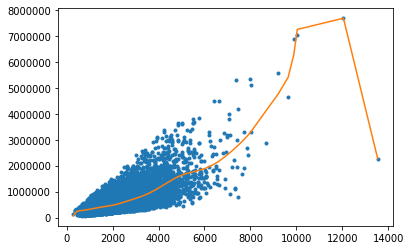

In [300]:
y_pred = model.predict(X) 
import matplotlib.pyplot as plt
# plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
# %matplotlib inline
plt.plot(X['power_1'],y,'.',X['power_1'], y_pred,'-')

In [301]:
model.coef_

array([ 1.45714210e+04, -4.26493198e+01,  7.01293389e-02, -7.21229256e-05,
        4.94962098e-08, -2.36022488e-11,  8.02652430e-15, -1.97727370e-18,
        3.55226964e-22, -4.64439416e-26,  4.36329997e-30, -2.86482403e-34,
        1.24612369e-38, -3.22231087e-43,  3.74558127e-48])

In [302]:
model.intercept_

-1865881.554522533

In [180]:
model.score(X, y, sample_weight=None)


0.0908710236914877